In [3]:
# STEP 1: Loading and inspecting the dataset

# Numeric analysis
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Data Visualization
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Loading the dataset
df = pd.read_csv("diabetic_data.csv")

# Inspecting the dataset
df.shape
num_features = df.shape[1]
num_observations = df.shape[0]

print("Number of features:", num_features)
print("Number of observations:", num_observations)

# STEP 2: FEATURE SELECTION for Q1

# List of features you want to select
selected_features = ['change','metformin','insulin','age','gender','number_emergency','readmitted','num_medications','number_diagnoses','time_in_hospital','num_lab_procedures','num_procedures']

# Select the list of features from the DataFrame
selected_df = df[selected_features]

# Display the selected DataFrame

selected_df.shape
num_features_sdf = selected_df.shape[1]
num_observations_sdf = selected_df.shape[0]

print("Number of features of selected_df:", num_features_sdf)
print("Number of observations of selected_df:", num_observations_sdf)

'''
print(selected_df)
'''

# STEP 2.1: Exploring missing values

# Check for missing values in the entire DataFrame
missing_values_total_df2 = selected_df.isnull().sum().sum()
missing_values_per_column_df2 = selected_df.isnull().sum()


if missing_values_total_df2 > 0:
    print("There are missing values in the dataset.")
    print("Number of missing values per column:")
    print(missing_values_per_column_df2)
else:
    print("There are no missing values in the dataset.")

# STEP 3: Binarize the variables 

# 3.1 Encode categorical features for the analysis 

'''
print(selected_df.dtypes)
'''

# 3.2 Binarise change, metformin, insulin, age and gender:

# Binarize 'readmitted'
selected_df['readmitted'] = selected_df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

# Binarize 'metformin'
selected_df['metformin'] = selected_df['metformin'].apply(lambda x: 0 if x == 'No' else 1)

# Binarize 'insulin'
selected_df['insulin'] = selected_df['insulin'].apply(lambda x: 0 if x == 'No' else 1)

# Binarize 'change'
selected_df['change'] = selected_df['change'].apply(lambda x: 0 if x == 'No' else 1)

# Binarize 'gender'
selected_df['gender'] = selected_df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Convert 'age' ranges to the midpoint of the range
age_map = {
    "[0-10)": 5,
    "[10-20)": 15,
    "[20-30)": 25,
    "[30-40)": 35,
    "[40-50)": 45,
    "[50-60)": 55,
    "[60-70)": 65,
    "[70-80)": 75,
    "[80-90)": 85,
    "[90-100)": 95
}
selected_df['age'] = selected_df['age'].map(age_map)

'''
print(selected_df.dtypes)
'''

Number of features: 50
Number of observations: 101766
Number of features of selected_df: 12
Number of observations of selected_df: 101766
There are no missing values in the dataset.


/var/folders/xn/bs9q225146db_t1vm2f9gp780000gn/T/ipykernel_16843/122478727.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['readmitted'] = selected_df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)
/var/folders/xn/bs9q225146db_t1vm2f9gp780000gn/T/ipykernel_16843/122478727.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['metformin'] = selected_df['metformin'].apply(lambda x: 0 if x == 'No' else 1)
/var/folders/xn/bs9q225146db_t1vm2f9gp780000gn/T/ipykernel_16843/1224787

'\nprint(selected_df.dtypes)\n'

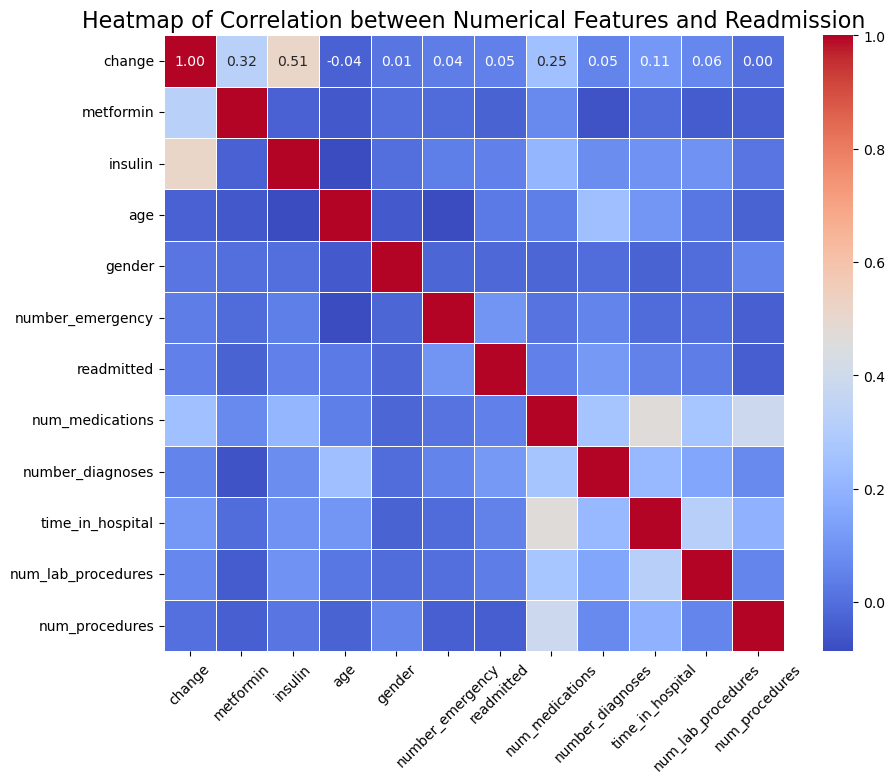

In [4]:
# HEATMAP to visualize the correlations between the numerical features and 'readmitted' as our target variable

corr_matrix = selected_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Add title and labels
plt.title('Heatmap of Correlation between Numerical Features and Readmission', size=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the heatmap
plt.show()



#### Correlation with readmitted (Target Variable):

+ number_emergency has the strongest positive correlation (close to 0.25) with readmitted. This suggests that as the number of emergency visits increases, the likelihood of readmission tends to increase.
+ time_in_hospital shows a mild positive correlation (~0.11) with readmitted, meaning longer hospital stays might slightly increase the likelihood of readmission.
+ Other features like num_medications, number_diagnoses, num_lab_procedures, and num_procedures show weak correlations with readmitted, close to 0.05, indicating that these factors may have a minor or negligible direct influence on hospital readmission.

#### Correlations Between Independent Variables:

+ change and insulin have a moderate positive correlation (~0.51), indicating that patients whose medications were changed tend to also be on insulin therapy.
+ metformin and insulin show a slight positive correlation (~0.32), suggesting that these treatments are often co-administered.
+ age and insulin show a slight negative correlation (-0.04), suggesting that older patients might be less likely to be prescribed insulin.
+ num_medications and number_diagnoses have a notable positive correlation (~0.25), indicating that patients with more diagnoses tend to be on more medications.

In [5]:
## FEATURE ENGINEERING 

# Create an interaction term between insulin and metformin
selected_df['insulin_metformin_interaction'] = selected_df['insulin'] * selected_df['metformin']

# Display the updated DataFrame with the new interaction term
print(selected_df[['insulin', 'metformin', 'insulin_metformin_interaction']].head())


   insulin  metformin  insulin_metformin_interaction
0        0          0                              0
1        1          0                              0
2        0          0                              0
3        1          0                              0
4        1          0                              0


/var/folders/xn/bs9q225146db_t1vm2f9gp780000gn/T/ipykernel_16843/541107327.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['insulin_metformin_interaction'] = selected_df['insulin'] * selected_df['metformin']


<Figure size 1000x600 with 0 Axes>

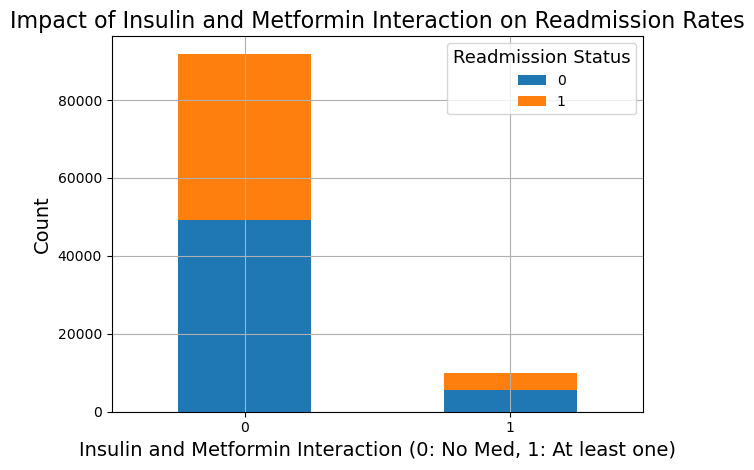

In [6]:
import matplotlib.pyplot as plt

# Prepare the data
# Create a DataFrame with the interaction term and readmission status
data = selected_df[['insulin', 'metformin', 'readmitted', 'insulin_metformin_interaction']]

# Group data by interaction term and readmission status
grouped_data = data.groupby(['insulin_metformin_interaction', 'readmitted']).size().unstack(fill_value=0)

# Create the plot
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Impact of Insulin and Metformin Interaction on Readmission Rates', fontsize=16)
plt.xlabel('Insulin and Metformin Interaction (0: No Med, 1: At least one)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)  # Adjusted for better visibility
plt.legend(title='Readmission Status', title_fontsize='13', loc='upper right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
# Function to perform Chi-Square Test
def chi_square_test(variable, target):
    # Create a contingency table
    contingency_table = pd.crosstab(selected_df[variable], selected_df[target])
    
    # Perform the Chi-Square Test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    print(f"Chi-Square Test for {variable} and {target}:")
    print(f"Chi2 Value: {chi2:.4f}")
    print(f"P-Value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)
    
    # Interpretation
    alpha = 0.05
    if p < alpha:
        print(f"Reject the null hypothesis: There is a significant association between {variable} and {target}.\n")
    else:
        print(f"Fail to reject the null hypothesis: No significant association between {variable} and {target}.\n")

# Performing Chi-Square Tests for each categorical variable
chi_square_test('change', 'readmitted')
chi_square_test('metformin', 'readmitted')
chi_square_test('insulin', 'readmitted')

Chi-Square Test for change and readmitted:
Chi2 Value: 215.2228
P-Value: 0.0000
Degrees of Freedom: 1
Expected Frequencies:
[[29519.46937091 25235.53062909]
 [25344.53062909 21666.46937091]]
Reject the null hypothesis: There is a significant association between change and readmitted.

Chi-Square Test for metformin and readmitted:
Chi2 Value: 80.4370
P-Value: 0.0000
Degrees of Freedom: 1
Expected Frequencies:
[[44088.08631567 37689.91368433]
 [10775.91368433  9212.08631567]]
Reject the null hypothesis: There is a significant association between metformin and readmitted.

Chi-Square Test for insulin and readmitted:
Chi2 Value: 203.8245
P-Value: 0.0000
Degrees of Freedom: 1
Expected Frequencies:
[[25545.08295501 21837.91704499]
 [29318.91704499 25064.08295501]]
Reject the null hypothesis: There is a significant association between insulin and readmitted.



### Summary

**Significant Associations:** All three tests show a statistically significant relationship between the variables **change**, **metformin**, and **insulin** with the readmission status.

**Implications:** This suggests that changes in medication (like dosage adjustments), administration of metformin, and use of insulin are associated with whether patients are readmitted to the hospital. Further analysis can be conducted to explore the nature of these associations and how they may impact patient outcomes.

In [8]:
# Separate the data into readmitted and not readmitted groups
readmitted_group = selected_df[selected_df['readmitted'] == 1]
not_readmitted_group = selected_df[selected_df['readmitted'] == 0]

# List of continuous variables to test
continuous_vars = ['time_in_hospital', 'num_medications']

# Initialize results dictionary
t_test_results = {}

# Perform T-tests for each continuous variable
for var in continuous_vars:
    t_stat, p_value = stats.ttest_ind(readmitted_group[var], not_readmitted_group[var])
    t_test_results[var] = {
        'T-statistic': t_stat,
        'P-value': p_value
    }

# Display the results
for var, result in t_test_results.items():
    print(f"T-Test for {var}:")
    print(f"T-statistic: {result['T-statistic']:.4f}")
    print(f"P-value: {result['P-value']:.4f}\n")

T-Test for time_in_hospital:
T-statistic: 16.3830
P-value: 0.0000

T-Test for num_medications:
T-statistic: 14.9369
P-value: 0.0000



### Test for `time_in_hospital`
- **T-statistic: 16.3830**:  
  This high value indicates a large difference between the means of the two groups (readmitted vs. not readmitted) relative to the variation within the groups. A T-statistic this high suggests a significant effect.

- **P-value: 0.0000**:  
  The P-value is significantly less than the conventional alpha level of 0.05, indicating strong evidence against the null hypothesis. This means we can reject the null hypothesis, suggesting that there is a statistically significant difference in the average length of hospital stay (`time_in_hospital`) between the readmitted and non-readmitted patients.

### Test for `num_medications`
- **T-statistic: 14.9369**:  
  Similar to the previous variable, this high T-statistic suggests a substantial difference between the means of the two groups in terms of the number of medications administered. The higher the T-statistic, the greater the difference observed.

- **P-value: 0.0000**:  
  Again, this P-value is much lower than 0.05, providing strong evidence to reject the null hypothesis. This indicates that the average number of medications prescribed (`num_medications`) significantly differs between readmitted and non-readmitted patients.



### Clinical Implications:
- **Length of Stay**:  
  The significantly longer average hospital stay for readmitted patients suggests that these individuals may have more complex or poorly managed conditions that require extended treatment periods.

- **Medication Management**:  
  The higher average number of medications for readmitted patients may indicate more extensive treatment plans or complications that necessitate multiple prescriptions. This could imply a need for better medication adherence strategies or monitoring.

### Recommendations and Actionable Insights
- **High-risk Group Interventions**:  
  Based on the patterns identified, if certain patient profiles (e.g., no insulin/metformin with high emergency visits) are at higher risk of readmission, targeted intervention programs can be developed.

- **Improved Medication Management**:  
  For patients showing inconsistent medication use, interventions could focus on improving adherence or adjusting medication plans.